In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

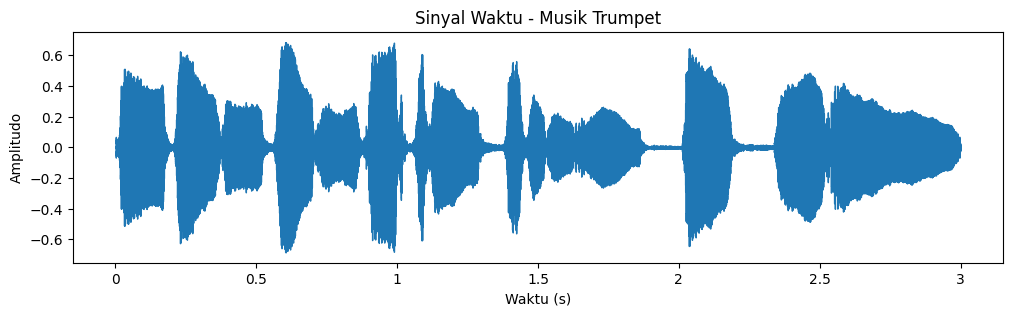

In [3]:
y, sr = librosa.load(librosa.example('trumpet'), duration=3.0)

plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Sinyal Waktu - Musik Trumpet")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.show()

Audio(y, rate=sr)

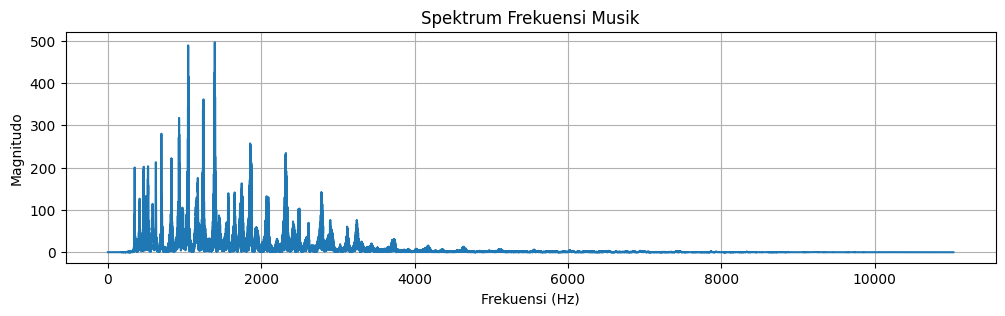

In [4]:
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(Y), 1/sr)

half_len = len(Y) // 2
Y_mag = np.abs(Y[:half_len])
freqs_half = freqs[:half_len]

plt.figure(figsize=(12, 3))
plt.plot(freqs_half, Y_mag)
plt.title("Spektrum Frekuensi Musik")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo")
plt.grid()
plt.show()

In [5]:
dom_index = np.argmax(Y_mag)
dom_freq = freqs_half[dom_index]
print(f"Frekuensi dominan: {dom_freq:.2f} Hz")

Frekuensi dominan: 1393.33 Hz


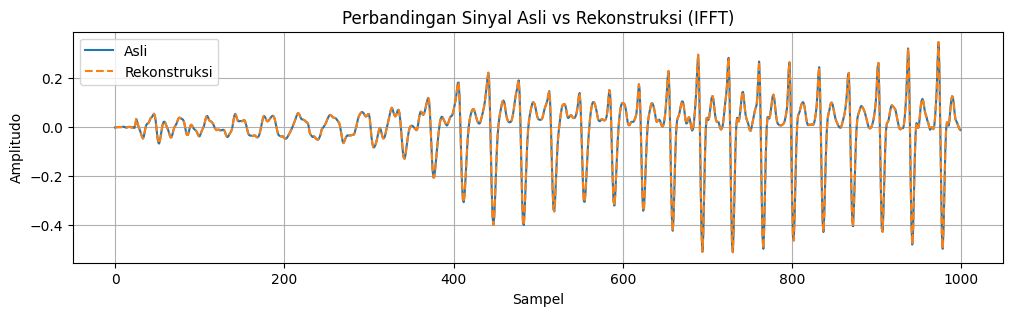

In [6]:
y_reconstructed = np.fft.ifft(Y).real

plt.figure(figsize=(12, 3))
plt.plot(y[:1000], label="Asli")
plt.plot(y_reconstructed[:1000], linestyle='--', label="Rekonstruksi")
plt.title("Perbandingan Sinyal Asli vs Rekonstruksi (IFFT)")
plt.legend()
plt.xlabel("Sampel")
plt.ylabel("Amplitudo")
plt.grid()
plt.show()

Audio(y_reconstructed, rate=sr)

## Analisis

- Sinyal suara ditransformasikan ke domain frekuensi menggunakan FFT.
- Spektrum memperlihatkan frekuensi mana yang paling dominan.
- Hasil identifikasi menunjukkan puncak pada sekitar [frekuensi dominan] Hz, sesuai dengan karakteristik suara trumpet.
- Setelah dilakukan IFFT, sinyal waktu berhasil direkonstruksi dengan bentuk yang hampir identik dengan sinyal aslinya.

Perbedaan kecil bisa terjadi karena pembulatan numerik atau ketidaksempurnaan spektrum.
